In [1]:
import numpy as np


def sum_of_square_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)


t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(sum_of_square_error(np.array(y), np.array(t)))

y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_of_square_error(np.array(y2), np.array(t)))





0.09750000000000003
0.5975


In [2]:
import sys, os
import numpy as np
from dataset.mnist import load_mnist

sys.path.append(os.pardir)

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# one_hot_label 정답 위치의 원소만 1이고 나머지는 0

print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10

# 6만개중 10개의 인덱스를 임의로 뽑아냄
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]


# 교차 엔트로피 오차 구하기
# y는 출력, t는 정답 레이블
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size



(60000, 784)
(60000, 10)


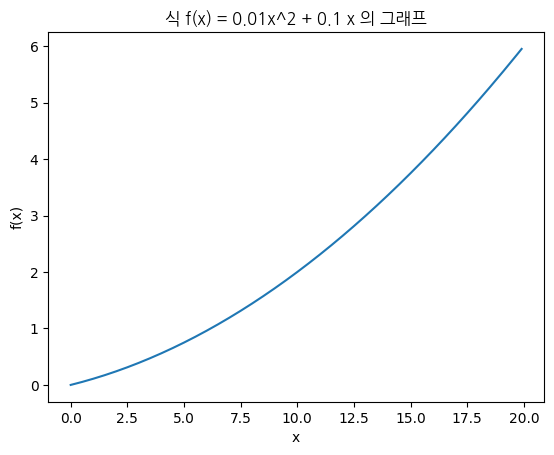

0.1999999999990898
0.2999999999986347


In [6]:
# 4.3 수치 미분 (numerical differentiation)
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)


def func1(x):
    return 0.01 * x ** 2 + 0.1 * x


plt.title("f(x) = 0.01x^2 + 0.1 x 의 그래프", {'fontname': 'Nanum Gothic'})
plt.xlabel("x")
plt.ylabel("f(x)")
x = np.arange(0.0, 20.0, 0.1)
y = func1(x)
plt.plot(x, y)
plt.show()

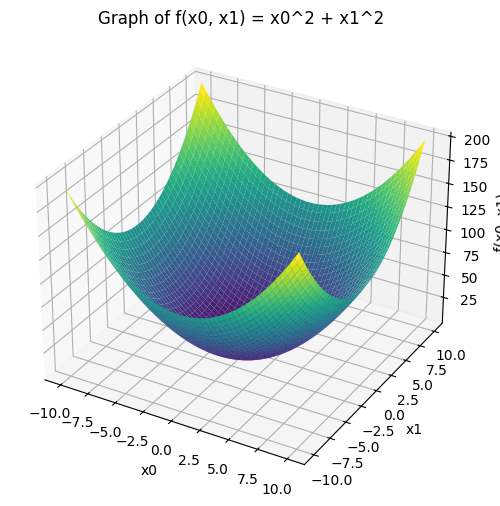

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# Define the function f(x0, x1)
def f(x0, x1):
    return x0 ** 2 + x1 ** 2


# Create a grid of points
x0 = np.linspace(-10, 10, 400)
x1 = np.linspace(-10, 10, 400)
x0, x1 = np.meshgrid(x0, x1)
z = f(x0, x1)

# Plot the function
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(x0, x1, z, cmap='viridis')

ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x0, x1)')
ax.set_title('Graph of f(x0, x1) = x0^2 + x1^2')

plt.show()

# 변수가 여럿인 함수에 대한 미분 : 편미분